<a href="https://colab.research.google.com/github/MartinPSE/PyTorch_Basic/blob/main/Softmax_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Softmax Regression 
---
  3개 이상의 선택지로부터 1개를 선택하는 '다중 클래스 분류(Multi-Class classification)를 풀기 위한 소프트맥스 회귀

## 원-핫 인코딩(One-Hot Encoding)
---
  선택해야 하는 선택지의 개수만큼의 차원을 가지면서, 각 선택지의 인덱스에 해당하는 원소에는 '1', 나머지 원소는 '0'의 값을 가지도록 하는 표현 방법

  즉, 분류 문제 모든 클래스 간의 관계를 균등하게 분배하기 위해! <br>
  각 클래스의 표현 방법이 무작이성을 가진다는 점을 표현할 수 있다. <br>
  하지만, 단어의 유사성을 구할 수 없다는 단점! 존재

### 다중 클래스 분류 
---
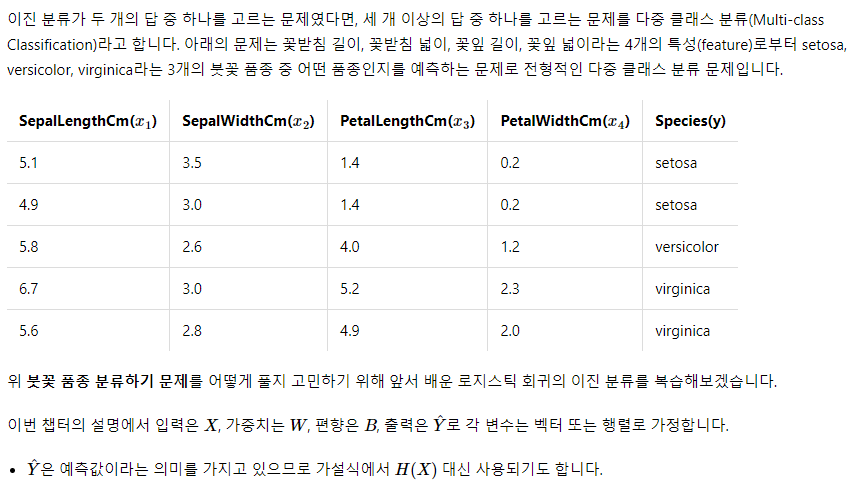

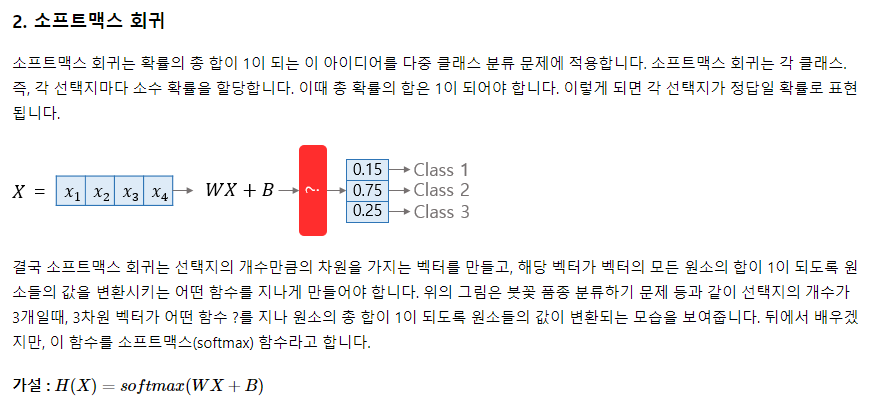

### 소프트맥스 함수 (Softmax Function)
---
  분류해야하는 정답지(클래스) 의 총 개수를 k라고 할 때, k차원의 벡터를 입력받아 각 클래스에 대한 확률을 추정한다. 

##### 1) 소프트 맥스 함수의 이해
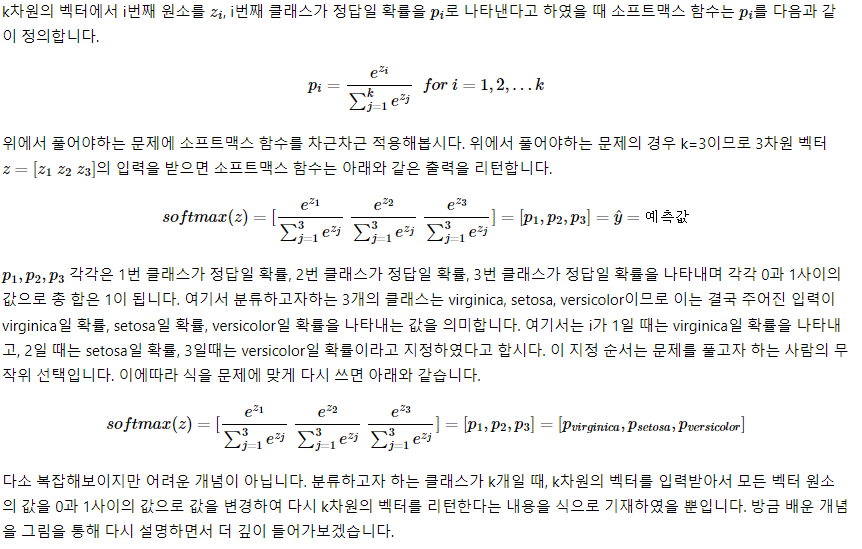

#### 2) 그림을 통한 이해
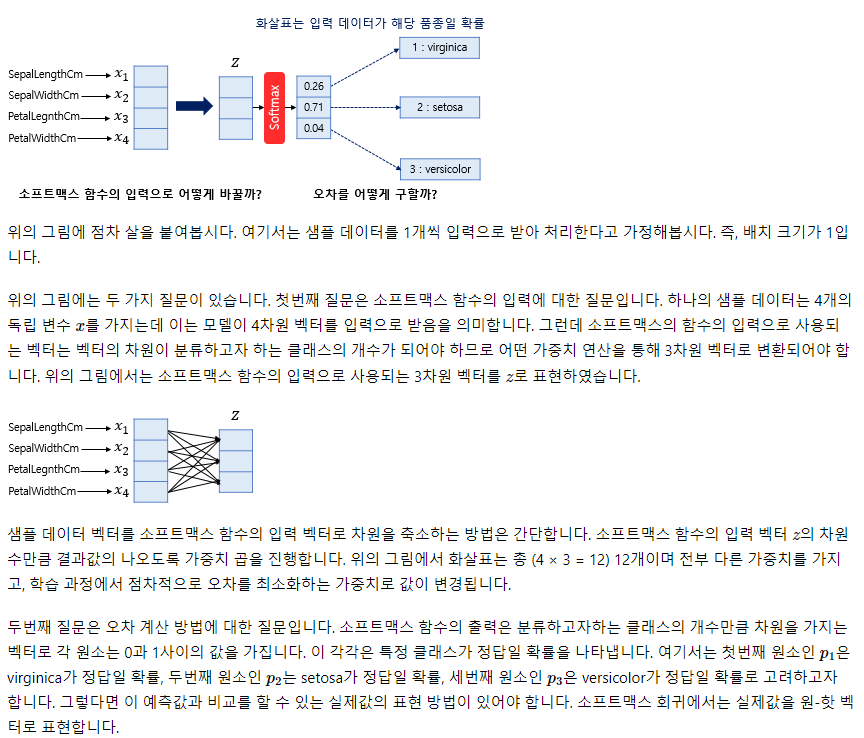

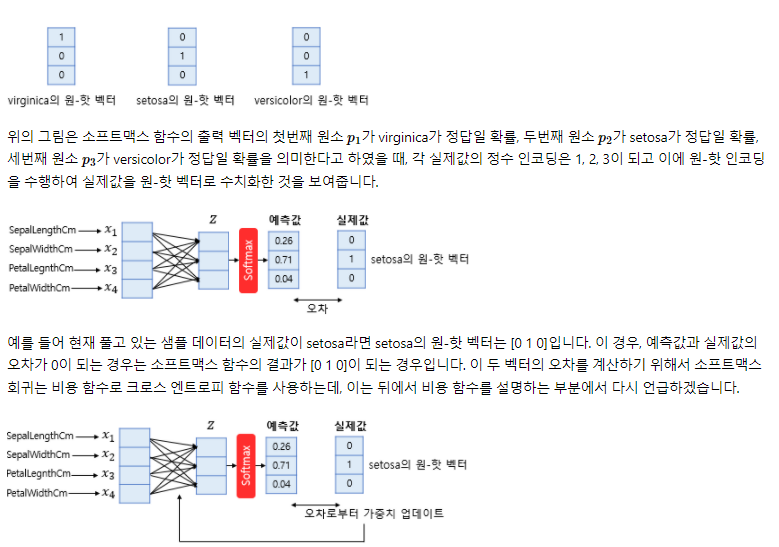

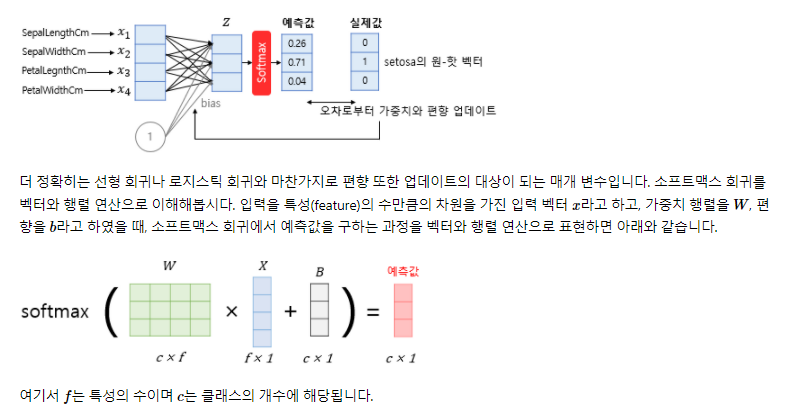

5개의 Sample을 가지고 회귀식을 행렬로 살펴보게되면  <br>
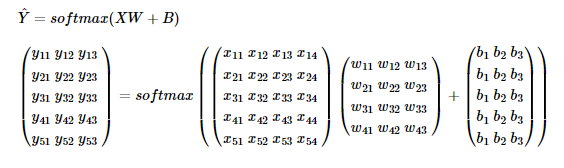

#### 3) 비용 함수 ( Cost fucntion )
---
  소프트맥스 회귀에서는 비용 함수로 '크로스 엔트로피 함수'를 사용한다.

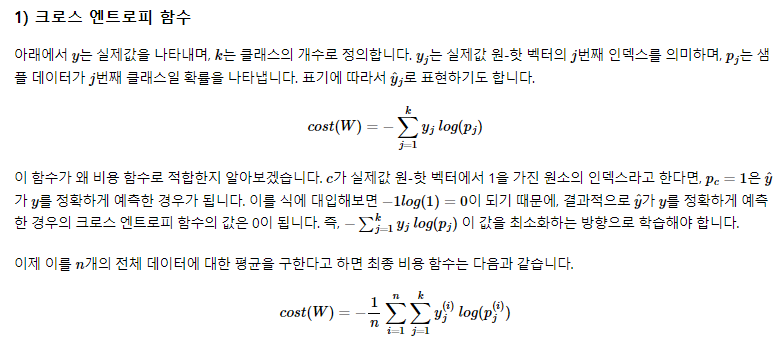

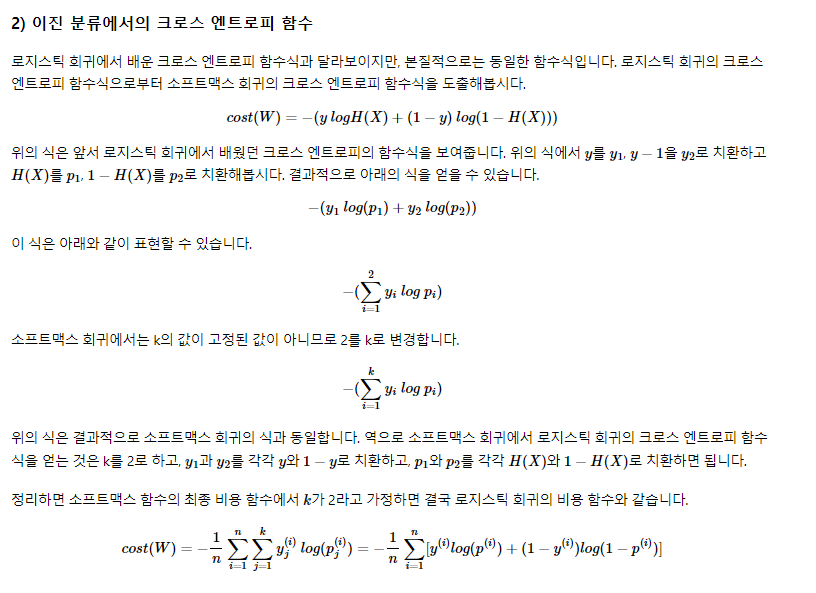

SoftMax : https://www.youtube.com/watch?v=LLux1SW--oM

#### 3-1) 비용 함수 구현하기


In [52]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

z = torch.FloatTensor([1,2,3])

In [6]:
hypothesis= F.softmax(z, dim = 0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [7]:
hypothesis.sum()

tensor(1.)

In [8]:
# 비용함수 직접구현

z = torch.rand(3,5, requires_grad= True)

hypothesis = F.softmax(z, dim=1)
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)


In [23]:
# 각 샘플에 대해서 임의의 레이블을 만들어서 예측을 했는지 보자고

y = torch.randint(5,(3,)).long()
print(y)


tensor([4, 2, 3])


In [31]:
y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1), 1)

tensor([[0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.]])

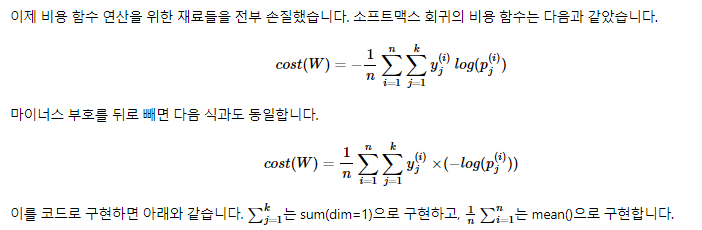

In [36]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
cost

tensor(1.7849, grad_fn=<MeanBackward0>)

#### 3-2) 비용 함수 구현하기 ( High - level )

1. F.softmax() + torch.log() = F.log_softmax()

In [38]:
torch.log(F.softmax(z, dim=1))

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]], grad_fn=<LogBackward0>)

In [37]:
# 훨씬 간단하게 사용 가능
F.log_softmax(z, dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward0>)

2. F.log_softmax() + F.nll_loss() = F.cross_entorpy()

In [39]:
# Low level
# 첫번째 수식
(y_one_hot * -torch.log(F.softmax(z, dim=1))).sum(dim=1).mean()

tensor(1.7849, grad_fn=<MeanBackward0>)

In [40]:
# 두번째 수식
(y_one_hot * - F.log_softmax(z, dim=1)).sum(dim=1).mean()

tensor(1.7849, grad_fn=<MeanBackward0>)

In [41]:
# High level
# 세번째 수식
F.nll_loss(F.log_softmax(z, dim=1), y)

tensor(1.7849, grad_fn=<NllLossBackward0>)

In [42]:
# 네번째 수식
F.cross_entropy(z, y)

tensor(1.7849, grad_fn=<NllLossBackward0>)

* F.cross_entorpy 는 비용 함수에 Softmax 함수까지 포함하고 있다는거 절대 잊지말자

## 소프트맥스 회귀 구현

In [44]:
# Dataset 생성
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

### 1. Low-Level


In [48]:
# 우리가 하고자 하는 class는 3개기 때문에 y^ 은 ( len(x_train)), 3) 이 나와야한다.
y_one_hot = torch.zeros(8,3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)

tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])

In [49]:
y_one_hot.shape

torch.Size([8, 3])

In [53]:
# x_train.shape = (8,4) --> W = (M, N)  --> y_one_hot.shape = (8,3)
# M  = 4 , N = 3

W = torch.zeros((4,3), requires_grad= True)
b = torch.zeros(1, requires_grad= True)

# optimizer
optimizer = optim.SGD([W,b], lr=0.1)

In [54]:
epochs = 1000
for epoch in range(epochs+1):
  # 가설
  hypothesis = F.softmax(x_train.matmul(W) + b , dim=1)

  # 비용함수
  cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 200 == 0:
    print(f'{epoch} / {epochs} , Cost : {cost}') 

0 / 1000 , Cost : 1.0986123085021973
200 / 1000 , Cost : 0.6899909973144531
400 / 1000 , Cost : 0.6041170954704285
600 / 1000 , Cost : 0.5339216589927673
800 / 1000 , Cost : 0.46690818667411804
1000 / 1000 , Cost : 0.39996209740638733


### High-Level
---
  F.cross_entorpy()를 사용하여 비용 함수를 구하면, softmax가 내장되어 있으므로 가설에서 softmax 함수 사용할 필요 없다.

In [56]:
# 모델을 초기화
W = torch.zeros((4,3), requires_grad=True)
b = torch.zeros(1, requires_grad= True)

# optimizer
optimizer = optim.SGD([W,b], lr = 0.1)

epochs = 1000
for epoch in range(epochs + 1):
  # cost 계산
  z = x_train.matmul(W) + b

  # 가설 + 비용함수 
  cost = F.cross_entropy(z, y_train)

  # H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 200 == 0:
    print(f'{epoch} / {epochs} , Cost : {cost}')



  

0 / 1000 , Cost : 1.0986123085021973
200 / 1000 , Cost : 0.6899909377098083
400 / 1000 , Cost : 0.6041173338890076
600 / 1000 , Cost : 0.5339218378067017
800 / 1000 , Cost : 0.4669080078601837
1000 / 1000 , Cost : 0.3999621570110321


### nn.Module로 구현


In [59]:
# output_dim 은 class 의 갯수가 되겠죠?
model = nn.Linear(4,3)

optimizer = optim.SGD(model.parameters(), lr = 0.1)

epochs = 1000
for epoch in range(epochs + 1):
  prediction = model(x_train)

  cost = F.cross_entropy(prediction, y_train)

  # H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 200 == 0 :
    print(f'{epoch} / {epochs} , Cost : {cost:.3f}')



0 / 1000 , Cost : 1.366
200 / 1000 , Cost : 0.638
400 / 1000 , Cost : 0.527
600 / 1000 , Cost : 0.433
800 / 1000 , Cost : 0.341
1000 / 1000 , Cost : 0.255


### 클래스로 구현하기

In [60]:
class SoftmaxClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(4,3) # Output_dim ==> 3

  def forward(self, x ):
    return self.linear(x)
    
    

In [62]:
model = SoftmaxClassifier()

optimizer = optim.SGD(model.parameters(), lr =0.1)

epochs= 1000
for epoch in range(epochs + 1 ):
  prediction = model(x_train)

  cost = F.cross_entropy(prediction, y_train)


  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 20번마다 로그 출력
  if epoch % 100 == 0:
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, epochs, cost.item()
      ))


Epoch    0/1000 Cost: 2.894385
Epoch  100/1000 Cost: 0.713320
Epoch  200/1000 Cost: 0.631103
Epoch  300/1000 Cost: 0.573847
Epoch  400/1000 Cost: 0.523610
Epoch  500/1000 Cost: 0.476214
Epoch  600/1000 Cost: 0.430079
Epoch  700/1000 Cost: 0.384448
Epoch  800/1000 Cost: 0.338987
Epoch  900/1000 Cost: 0.294060
Epoch 1000/1000 Cost: 0.253870


## 소프트맥스 회귀로 MNIST 데이터 분류하기!

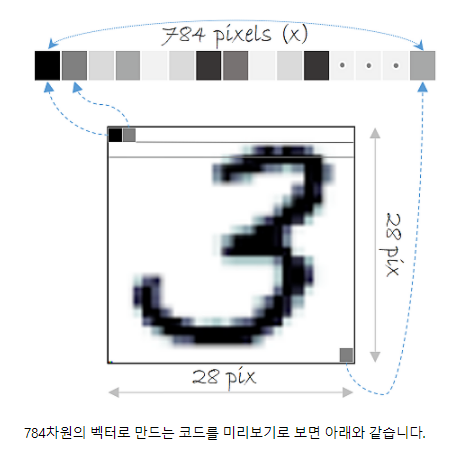

In [11]:
# 필요함수들 import

import torch
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [2]:
USE_CUDA = torch.cuda.is_available()
device = torch.device('cuda' if USE_CUDA else 'cpu')
print("DEVICE ", device)

DEVICE  cuda


In [4]:
# seed 고정
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [5]:
# hyperparameters
training_epochs = 15
batch_size = 100

In [7]:
dataset = dsets.MNIST(root='MNIST_data/',
                      train= True,
                      transform = transforms.ToTensor(),
                      download=True)

testset = dsets.MNIST(root='MNIST_data/',
                      train= False,
                      transform = transforms.ToTensor(),
                      download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [8]:
data_loader = DataLoader(dataset = dataset,
                         batch_size = batch_size ,
                         shuffle = True,
                         drop_last= True)

In [9]:
linear = nn.Linear(784, 10, bias=True).to(device)

In [12]:
# 비용 함수 와 optimizer
# functional 이랑 nn 에 들어있는 Crossentropy 다 동일하다.

criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(linear.parameters(), lr=0.1)

In [29]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for X,Y in data_loader:
    # Batch_size = 100 이므로, X 는 (100, 784) Tensor가 되겠죠?
    X = X.view(-1,28*28).to(device)
    # 레이블은 0 ~ 9 겠죠?
    Y = Y.to(device)

    # Tunning
    optimizer.zero_grad()

    hypothesis = linear(X)
    cost = criterion(hypothesis, Y)
    cost.backward()

    optimizer.step()

    avg_cost += cost / total_batch

  print(f'Epoch : {epoch+1:04d}, Cost : {avg_cost:.9f}')

Epoch : 0001, Cost : 0.268277347
Epoch : 0002, Cost : 0.267255455
Epoch : 0003, Cost : 0.266613454
Epoch : 0004, Cost : 0.265661418
Epoch : 0005, Cost : 0.264922321
Epoch : 0006, Cost : 0.263888717
Epoch : 0007, Cost : 0.263269812
Epoch : 0008, Cost : 0.262586176
Epoch : 0009, Cost : 0.261751652
Epoch : 0010, Cost : 0.261135817
Epoch : 0011, Cost : 0.260536909
Epoch : 0012, Cost : 0.260275453
Epoch : 0013, Cost : 0.259709120
Epoch : 0014, Cost : 0.258947164
Epoch : 0015, Cost : 0.258617997


torch.Size([10000, 784])
Accuracy : 0.8711999654769897
Label : tensor([2], device='cuda:0')
Prediction : 2


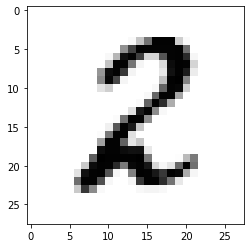

In [31]:
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
  X_test = testset.data.view(-1, 28*28).float().to(device)
  Y_test = testset.targets.to(device)

  prediction = linear(X_test)
  correct_prediction = torch.argmax(prediction, 1) == Y_test

  accuracy = correct_prediction.float().mean()
  print(f'Accuracy : {accuracy.item()}')

  # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해보자
  r = random.randint(0, len(testset) -1)
  X_single_data = testset.data[r:r+1].view(-1, 28*28).float().to(device)
  Y_single_data = testset.targets[r:r+1].to(device)

  print(f"Label : {Y_single_data}")
  single_prediction = linear(X_single_data)
  print(f'Prediction : {torch.argmax(single_prediction, 1).item()}')

  plt.imshow(testset.data[r:r+1].view(28,28), cmap='Greys', interpolation='nearest')
  plt.show()
